In [ ]:
# %pip install gdal

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from osgeo import gdal


In [20]:
import matplotlib.pyplot as plt

In [6]:
%pwd

'/home/suraj/Desktop/smc-ip'

In [7]:

# Set the paths to the Sentinel-1 data and the output file
image_path = 'res/sent1-march-v1/S1A_IW_GRDH_1SDV_20220304T130418_20220304T130443_042172_05067B_AD83.tif'
output_path = 'output.csv'

In [9]:
# Load the Sentinel-1 data using gdal
gdal_data = gdal.Open(image_path)
data = gdal_data.ReadAsArray()

In [32]:
gdal_data.RasterCount

1

In [34]:
band_1 = gdal_data.GetRasterBand(1) 

In [31]:
# # plt.imshow(gdal_data)
# # plt.show()
# plt.imshow(np.transpose(data, (1, 2, 0)))
# plt.show()

In [29]:
# import rasterio
# # from matplotlib import pyplot as plt

# # Open the TIFF file using rasterio
# with rasterio.open(image_path) as src:
#     # Read the image data as a numpy array
#     img = src.read()
# #     img = src.ReadAsArray(0)

# # Plot the image using matplotlib
# plt.imshow(img)
# plt.show()

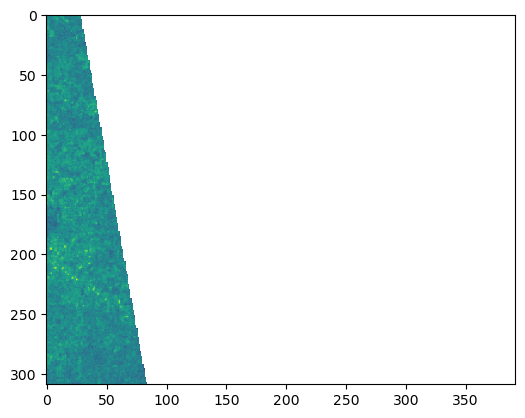

<Axes: >

In [35]:
# import rasterio
from rasterio.plot import show
show(img)

In [30]:
# %pip install rasterio

In [17]:
data.shape
# Flatten the data into a 2D array
# rows, cols = data.shape[1:]
# data_2d = data.reshape(data.shape[0], rows * cols).T
df = pd.DataFrame(data)


In [19]:

# Load the feature data into a pandas DataFrame
# df = pd.DataFrame(data_2d)

# Define the target variable (soil moisture)
# target = np.random.rand(rows * cols)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
rf.fit(df, target)

# Predict soil moisture values for the Sentinel-1 data
soil_moisture_pred = rf.predict(df)

# Save the predicted soil moisture values to a CSV file
np.savetxt(output_path, soil_moisture_pred, delimiter=",")


NameError: name 'target' is not defined